In [46]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.axis as axis
import numpy as np
import math

In [95]:
a0 = 0.05984281113
cla = 4.752798721
cda = 0.6417112299
alpha_stall = np.rad2deg(0.3391428111)
alpha_stallR = 0.3391428111
cla_stall = -3.85
cda_stall = -0.9233984055
area = 0.6
air_density = 1.2041
g = 9.81
mass = 1.5

In [66]:
def coefficientLift(cla, alpha, alpha0):
        alpha = np.deg2rad(alpha)
        Cl = cla*(alpha - alpha0)
        return Cl

def dynamic_pressure(rho, v):
    Q = .5 * rho * (v*v)
    return Q    
    
def lift(cl, Q, S):
    L = cl * Q * S
    return L

def velocity(lift, cl, s, rho):
    V = np.sqrt((2 * lift) / (cl * s * rho))
    return V

def stall_function(alpha, alpha_stall):
    if alpha < alpha_stall:
        cl = 2*np.pi*alpha  # The lift coefficient for a non-stalled airfoil
    else:
        cl = 2*np.pi*alpha_stall*(np.cos(alpha_stall)/(np.cos(alpha_stall-alpha)))
    return cl


## Cl vs AoA

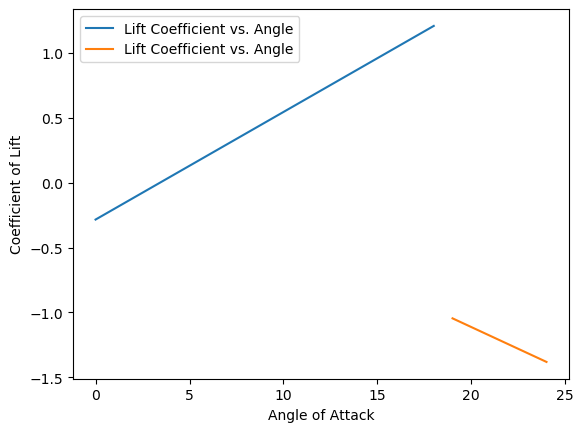

[-0.28442083619970854, -0.20146884983368316, -0.11851686346765783, -0.03556487710163246, 0.04738710926439288, 0.1303390956304182, 0.21329108199644362, 0.29624306836246894, 0.37919505472849424, 0.4621470410945196, 0.545099027460545, 0.6280510138265702, 0.7110030001925958, 0.7939549865586211, 0.8769069729246464, 0.9598589592906717, 1.0428109456566972, 1.1257629320227225, 1.2087149183887478]


In [120]:
def coefficientLift1(cla, alpha, alpha0):
        alpha = np.deg2rad(alpha)
        Cl = cla*(alpha - alpha0)
        return Cl

list1 = []
list2 = []
for alpha in range(0, int(alpha_stall)):
    cl = coefficientLift1(cla, alpha, a0)
    list1.append(cl)
    list2.append(alpha)

list3 = []
list4 = []
for alpha in range(int(alpha_stall), 25):
    cl = coefficientLift1(cla_stall, alpha, a0)
    list3.append(cl)
    list4.append(alpha)
    
plt.plot(list2, list1, label="Lift Coefficient vs. Angle")
plt.plot(list4, list3, label="Lift Coefficient vs. Angle")
plt.legend()
plt.xlabel("Angle of Attack")
plt.ylabel("Coefficient of Lift")
plt.show()
print(list1)

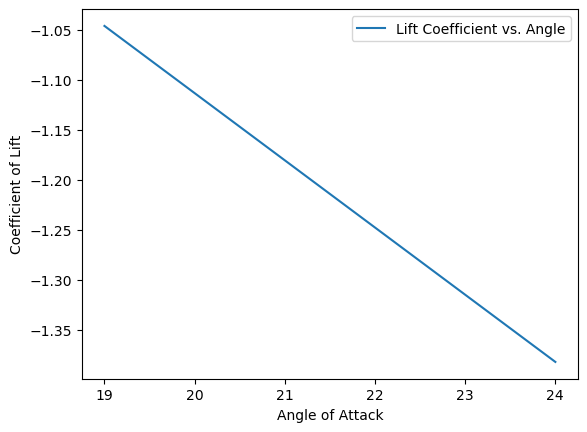

In [70]:
# fills coeff of lift and angle list 
clList = []
angleList = []
for angle in range(0, 20):
    cl = coefficientLift(cla, angle, a0)
    clList.append(cl)
    angleList.append(angle)

In [71]:
stallList = []
for alpha in range(0, int(alpha_stall)):
    alpha = np.deg2rad(alpha)
    stall = stall_function(alpha, alpha_stall)
    # print(stall)
    stallList.append(stall)

In [72]:
# filles dynamic pressure list
qList = []
for speed in range(0,20):
    dyn_press = dynamic_pressure(air_density, speed)
    qList.append(dyn_press)

In [73]:
liftList = []
for j, i in enumerate(qList):
    l = lift(clList[j], qList[j], area)    
    liftList.append(l)

In [74]:
velList = []
for j, i in enumerate(liftList):
    vel = velocity(liftList[j], clList[j], area, air_density)    
    velList.append(vel)

In [77]:
# print(liftList)

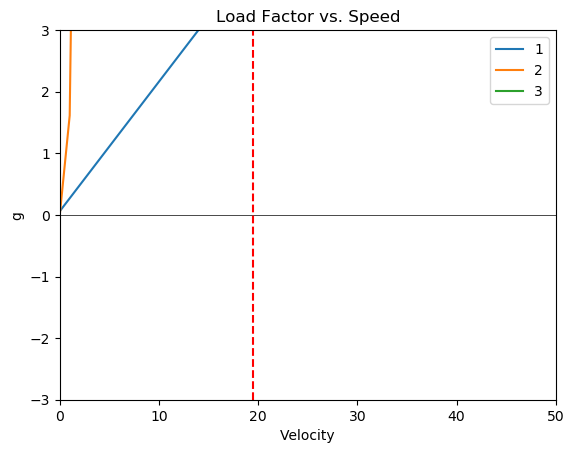

In [81]:
plt.plot(clList, angleList, label = '1')
plt.plot(velList, liftList, label = '2')
plt.plot(a0, alpha_stall, label = '3')

# plt.spines['bottom'].set_visible(False)
plt.axhline(0, color='black', lw=0.5)
plt.xlim(0,50) 
plt.axvline(x=alpha_stall, color='r', linestyle='--')
plt.xlabel('Velocity')

plt.ylim(-3,3) 
plt.ylabel('g')

plt.legend(loc='best')
plt.title('Load Factor vs. Speed')
plt.grid(False)
plt.show()

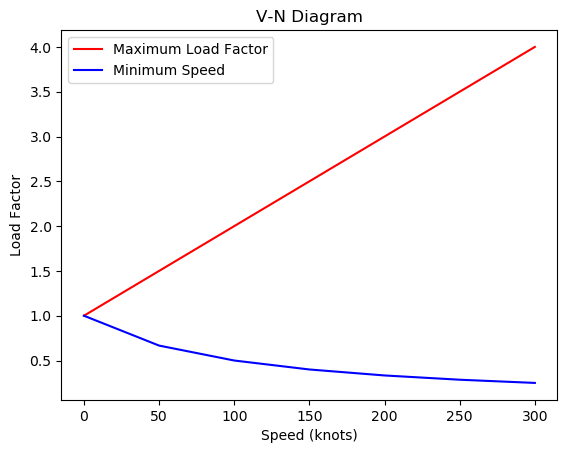

In [80]:
speeds = np.array([0, 50, 100, 150, 200, 250, 300])
load_factors = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4])
plt.plot(speeds, load_factors, 'r', label='Maximum Load Factor')
plt.plot(speeds, 1/load_factors, 'b', label='Minimum Speed')
plt.xlabel('Speed (knots)')
plt.ylabel('Load Factor')
plt.title('V-N Diagram')
plt.legend(loc='best')
plt.show()
